In [133]:
#import all packages 
import pandas as pd
import warnings
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

data = pd.read_csv('kc_house_data.csv')

In [117]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [118]:
# drop columns that have no desire to our stakeholder 
clean_null = data.drop(columns=['id','date','condition','sqft_living15','sqft_lot15','floors','view', 'waterfront', 'yr_renovated'], axis=1)
clean_null

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1180,5650,7 Average,1180,0.0,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,7 Average,2170,400.0,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,770,10000,6 Low Average,770,0.0,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,7 Average,1050,910.0,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,8 Good,1680,0.0,1987,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,8 Good,1530,0.0,2009,98103,47.6993,-122.346
21593,400000.0,4,2.50,2310,5813,8 Good,2310,0.0,2014,98146,47.5107,-122.362
21594,402101.0,2,0.75,1020,1350,7 Average,1020,0.0,2009,98144,47.5944,-122.299
21595,400000.0,3,2.50,1600,2388,8 Good,1600,0.0,2004,98027,47.5345,-122.069


In [119]:
clean_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   grade          21597 non-null  object 
 6   sqft_above     21597 non-null  int64  
 7   sqft_basement  21597 non-null  object 
 8   yr_built       21597 non-null  int64  
 9   zipcode        21597 non-null  int64  
 10  lat            21597 non-null  float64
 11  long           21597 non-null  float64
dtypes: float64(4), int64(6), object(2)
memory usage: 2.0+ MB


In [ ]:
clean_null['sqft_basement']df.astype({'col1': 'int32'}).dtypes

In [209]:
clean_null['true_sqft'] = clean_null['sqft_living']  - clean_null['sqft_basement']
clean_null

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [281]:
test = [i[0:2].strip() for i in clean_null['grade']]


In [285]:
clean_null['grade_ordinal'] = [int(i[0:2].strip()) for i in clean_null['grade']]

In [286]:
# creating a new feature of price per sqft
clean_null['price_per_sqft'] = clean_null['price']  / clean_null['sqft_above']
clean_null


,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
0,221900.0,3,1.00,1180,5650,7 Average,1180,0.0,1955,98178,47.5112,-122.257,188.050847,7
1,538000.0,3,2.25,2570,7242,7 Average,2170,400.0,1951,98125,47.7210,-122.319,247.926267,7
2,180000.0,2,1.00,770,10000,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,233.766234,6
3,604000.0,4,3.00,1960,5000,7 Average,1050,910.0,1965,98136,47.5208,-122.393,575.238095,7
4,510000.0,3,2.00,1680,8080,8 Good,1680,0.0,1987,98074,47.6168,-122.045,303.571429,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,8 Good,1530,0.0,2009,98103,47.6993,-122.346,235.294118,8
21593,400000.0,4,2.50,2310,5813,8 Good,2310,0.0,2014,98146,47.5107,-122.362,173.160173,8
21594,402101.0,2,0.75,1020,1350,7 Average,1020,0.0,2009,98144,47.5944,-122.299,394.216667,7
21595,400000.0,3,2.50,1600,2388,8 Good,1600,0.0,2004,98027,47.5345,-122.069,250.000000,8


In [287]:
# eda stats 
clean_null.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,314.932069,7.657915
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,827.759761,29.375234,53.513072,0.138552,0.140724,147.454847,1.173200
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,1900.000000,98001.000000,47.155900,-122.519000,87.588235,3.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,206.489676,7.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,280.373832,7.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,391.441441,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,1516.746411,13.000000


In [288]:
# eda correlations
clean_null.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.605368,0.053953,-0.053402,0.306692,0.022036,0.578937,0.667951
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.479386,0.155670,-0.154092,-0.009951,0.132054,-0.075068,0.356563
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.686668,0.507173,-0.204786,0.024280,0.224903,-0.001625,0.665838
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.876448,0.318152,-0.199802,0.052155,0.241214,0.039930,0.762779
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,0.184139,0.052946,-0.129586,-0.085514,0.230227,-0.048217,0.114731
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,1.000000,0.424037,-0.261570,-0.001199,0.344842,-0.188362,0.756073
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.424037,1.000000,-0.347210,-0.148370,0.409993,-0.343851,0.447865
zipcode,-0.053402,-0.154092,-0.204786,-0.199802,-0.129586,-0.261570,-0.347210,1.000000,0.266742,-0.564259,0.208965,-0.185771
lat,0.306692,-0.009951,0.024280,0.052155,-0.085514,-0.001199,-0.148370,0.266742,1.000000,-0.135371,0.458387,0.113575
long,0.022036,0.132054,0.224903,0.241214,0.230227,0.344842,0.409993,-0.564259,-0.135371,1.000000,-0.298222,0.200341


In [289]:

y = clean_null['price']
x = clean_null['sqft_living']
X_c = sm.add_constant(x)


simple_model = sm.OLS(y, X_c)


simple_model_results = simple_model.fit()
print(simple_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:51:21   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [290]:
clean_null.columns


Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'price_per_sqft', 'grade_ordinal'],
      dtype='object')

In [291]:
clean_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   grade           21597 non-null  object 
 6   sqft_above      21597 non-null  int64  
 7   sqft_basement   21597 non-null  object 
 8   yr_built        21597 non-null  int64  
 9   zipcode         21597 non-null  int64  
 10  lat             21597 non-null  float64
 11  long            21597 non-null  float64
 12  price_per_sqft  21597 non-null  float64
 13  grade_ordinal   21597 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.3+ MB


In [292]:
#reviewing coef and p value significants 
y = clean_null['price']
X = clean_null.drop(['price','grade','sqft_basement'], axis=1)





y = y.dropna()
X = X.dropna()

# len(y), len(X)
ols_kch = sm.OLS(y, sm.add_constant(X)).fit()
ols_kch.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 1.316e+04
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:51:22   Log-Likelihood:            -2.8534e+05
No. Observations:               21597   AIC:                         5.707e+05
Df Residuals:                   21585   BIC:                         5.708e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.253e+07   1.82e+06      6.869      0.000    8.95e+06    1.61e+07
bedrooms       -9245.6973   1254.044     -7.373      0.000   -1.17e+04   -6787.679
bathrooms       9929.6613   2052.144      4.839      0.000    5907.308     1.4e+04
sqft_living       46.2005      2.707     17.067      0.000      40.895      51.506
sqft_lot          -0.1252      0.023     -5.491      0.000      -0.170      -0.080
sqft_above       269.5238      2.852     94.497      0.000     263.933     275.114
yr_built        -531.1673     44.308    -11.988      0.000    -618.013    -444.321
zipcode         -182.1641     21.359     -8.529      0.000    -224.029    -140.299
lat            -4.501e+04   7666.732     -5.870      0.000      -6e+04      -3e+04
long           -6.413e+04   8505.041     -7.540      0.000   -8.08e+04   -4.75e+04
price_per_sqft  1671.4695      8.876    188.320      0.000    1654.073    1688.866
grade_ordinal   1.751e+04   1433.625     12.211      0.000    1.47e+04    2.03e+04
==============================================================================
Omnibus:                    23673.379   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9353849.115
Skew:                           5.023   Prob(JB):                         0.00
Kurtosis:                     104.458   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [293]:
# homes in the tech company zones 
zip_home_size = clean_null.loc[clean_null['zipcode'].isin([98052,98102,98103,98105,98109,98119,98121,98134,98164])]

zip_home_size

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
17,485000.0,4,1.00,1600,4300,7 Average,1600,0.0,1916,98103,47.6648,-122.343,303.125000,7
26,937000.0,3,1.75,2450,2691,8 Good,1750,700.0,1915,98119,47.6386,-122.360,535.428571,8
29,719000.0,4,2.50,2570,7173,8 Good,2570,0.0,2005,98052,47.7073,-122.110,279.766537,8
36,550000.0,4,1.00,1660,34848,5 Fair,930,730.0,1933,98052,47.6621,-122.132,591.397849,5
43,685000.0,3,1.00,1570,2280,7 Average,1570,0.0,1922,98119,47.6413,-122.364,436.305732,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21563,645000.0,3,3.25,1730,1229,9 Better,1320,410.0,2008,98119,47.6374,-122.369,488.636364,9
21567,399950.0,2,1.00,710,1157,7 Average,710,0.0,1943,98102,47.6413,-122.329,563.309859,7
21576,475000.0,3,2.25,1190,1200,8 Good,1190,0.0,2008,98103,47.6542,-122.346,399.159664,8
21579,520000.0,2,2.25,1530,981,8 Good,1480,50.0,2006,98103,47.6533,-122.346,351.351351,8


In [294]:
zip_home_size.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
count,1.802000e+03,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000,1802.000000
mean,7.025994e+05,3.342952,2.163430,2030.928413,6153.189789,1716.784129,1960.594895,98088.947836,47.667558,-122.267604,430.524816,7.864040
std,3.722630e+05,1.235702,0.777019,863.715542,7018.586722,748.255508,38.267667,25.696225,0.024922,0.104322,141.908054,1.031887
min,2.166500e+05,1.000000,0.750000,390.000000,651.000000,390.000000,1900.000000,98052.000000,47.542000,-122.385000,126.802954,5.000000
25%,5.002500e+05,3.000000,1.750000,1410.000000,3000.000000,1190.000000,1923.250000,98052.000000,47.647900,-122.349000,318.563686,7.000000
50%,6.250000e+05,3.000000,2.250000,1850.000000,4517.000000,1520.000000,1968.000000,98103.000000,47.665350,-122.329000,410.206330,8.000000
75%,7.850000e+05,4.000000,2.500000,2500.000000,7299.500000,2060.000000,2000.000000,98105.000000,47.687800,-122.135000,521.428571,8.000000
max,7.700000e+06,33.000000,8.000000,12050.000000,111078.000000,8570.000000,2015.000000,98119.000000,47.731800,-122.029000,1055.045872,13.000000


In [295]:
#identifying the lots we recommend the stakeholder purchase and build new multifamily homes. 

zip_lot_size = clean_null.loc[(clean_null['zipcode'].isin([98052,98102,98103,98105,98109,98119,98121,98134,98164]))
                              & (clean_null['sqft_lot'] >= 20000)]

zip_lot_size

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
36,550000.0,4,1.00,1660,34848,5 Fair,930,730.0,1933,98052,47.6621,-122.132,591.397849,5
132,784000.0,3,3.50,3950,111078,9 Better,2460,1490.0,1989,98052,47.6970,-122.072,318.699187,9
340,485000.0,4,1.75,2560,43995,7 Average,2560,0.0,1962,98052,47.6945,-122.093,189.453125,7
415,570000.0,3,1.75,2910,37461,7 Average,1530,1380.0,1967,98052,47.7015,-122.164,372.549020,7
529,662000.0,3,1.75,2500,36947,9 Better,2500,0.0,1984,98052,47.6917,-122.084,264.800000,9
545,910000.0,4,2.50,3350,29242,11 Excellent,3350,0.0,1988,98052,47.7197,-122.131,271.641791,11
1258,609000.0,4,2.50,2150,37981,9 Better,2150,0.0,1985,98052,47.7227,-122.098,283.255814,9
1359,2200000.0,5,4.25,4640,22703,8 Good,2860,1780.0,1952,98052,47.6393,-122.097,769.230769,8
1431,2540000.0,4,3.00,3710,20000,10 Very Good,2760,950.0,1936,98105,47.6696,-122.261,920.289855,10
1523,775000.0,4,2.50,2540,28563,10 Very Good,2540,0.0,1984,98052,47.7185,-122.114,305.118110,10


In [296]:
# we have 17 lots for the stakeholder investment projects 
zip_lot_size.shape

(54, 14)

In [297]:
zip_lot_size.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
count,5.400000e+01,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,1.089457e+06,3.833333,2.671296,3245.240741,37781.796296,2886.351852,1974.851852,98056.796296,47.698389,-122.124463,366.534016,9.259259
std,1.067339e+06,0.720325,0.951444,1480.335033,16281.586269,1175.875670,23.487779,15.162490,0.030431,0.060006,184.233114,1.650445
min,4.450000e+05,3.000000,1.000000,1660.000000,20000.000000,930.000000,1910.000000,98052.000000,47.628900,-122.323000,189.453125,5.000000
25%,6.640000e+05,3.000000,2.312500,2462.500000,28125.000000,2160.000000,1978.250000,98052.000000,47.678800,-122.131000,269.434802,8.000000
50%,8.312500e+05,4.000000,2.500000,3120.000000,35613.500000,2745.000000,1985.000000,98052.000000,47.712550,-122.114500,289.700372,10.000000
75%,9.875000e+05,4.000000,2.937500,3665.000000,41906.000000,3442.500000,1988.000000,98052.000000,47.720150,-122.099000,368.232870,10.000000
max,7.700000e+06,6.000000,8.000000,12050.000000,111078.000000,8570.000000,2004.000000,98105.000000,47.731800,-122.029000,973.597360,13.000000


In [298]:
zip_lot_size.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
price,1.000000,0.451453,0.822240,0.893554,-0.179206,0.741973,-0.554510,0.757212,-0.474041,-0.722329,0.711715,0.461908
bedrooms,0.451453,1.000000,0.469164,0.470267,-0.102005,0.416941,-0.214491,0.247324,-0.284135,-0.256747,0.259340,0.116385
bathrooms,0.822240,0.469164,1.000000,0.868260,-0.054109,0.747129,-0.257833,0.470034,-0.270684,-0.472580,0.426857,0.532907
sqft_living,0.893554,0.470267,0.868260,1.000000,-0.033173,0.906076,-0.311055,0.546549,-0.232773,-0.543168,0.402000,0.589130
sqft_lot,-0.179206,-0.102005,-0.054109,-0.033173,1.000000,-0.075429,0.201367,-0.257194,0.156108,0.297140,-0.209855,-0.107742
sqft_above,0.741973,0.416941,0.747129,0.906076,-0.075429,1.000000,-0.079447,0.423320,-0.078381,-0.391740,0.148202,0.719060
yr_built,-0.554510,-0.214491,-0.257833,-0.311055,0.201367,-0.079447,1.000000,-0.701488,0.524631,0.702137,-0.703087,0.205433
zipcode,0.757212,0.247324,0.470034,0.546549,-0.257194,0.423320,-0.701488,1.000000,-0.497185,-0.875364,0.779127,0.295443
lat,-0.474041,-0.284135,-0.270684,-0.232773,0.156108,-0.078381,0.524631,-0.497185,1.000000,0.310841,-0.653193,0.191162
long,-0.722329,-0.256747,-0.472580,-0.543168,0.297140,-0.391740,0.702137,-0.875364,0.310841,1.000000,-0.721245,-0.295208


In [299]:
clean_null['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [300]:
clean_null.shape

(21597, 14)

In [301]:
clean_null.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21597 non-null  float64
 1   bedrooms        21597 non-null  int64  
 2   bathrooms       21597 non-null  float64
 3   sqft_living     21597 non-null  int64  
 4   sqft_lot        21597 non-null  int64  
 5   grade           21597 non-null  object 
 6   sqft_above      21597 non-null  int64  
 7   sqft_basement   21597 non-null  object 
 8   yr_built        21597 non-null  int64  
 9   zipcode         21597 non-null  int64  
 10  lat             21597 non-null  float64
 11  long            21597 non-null  float64
 12  price_per_sqft  21597 non-null  float64
 13  grade_ordinal   21597 non-null  int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 2.3+ MB


In [302]:
clean_null.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
0,221900.0,3,1.00,1180,5650,7 Average,1180,0.0,1955,98178,47.5112,-122.257,188.050847,7
1,538000.0,3,2.25,2570,7242,7 Average,2170,400.0,1951,98125,47.7210,-122.319,247.926267,7
2,180000.0,2,1.00,770,10000,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,233.766234,6
3,604000.0,4,3.00,1960,5000,7 Average,1050,910.0,1965,98136,47.5208,-122.393,575.238095,7
4,510000.0,3,2.00,1680,8080,8 Good,1680,0.0,1987,98074,47.6168,-122.045,303.571429,8


In [303]:
#Linearity
X = clean_null.drop(['price','price_per_sqft'], axis=1).select_dtypes(float,int)
ss = StandardScaler().fit(X)

X_scaled = ss.transform(X)

In [304]:
X_c = sm.add_constant(X_scaled)
y = clean_null['price']

In [305]:
model = sm.OLS(endog=y, exog=X_c).fit()

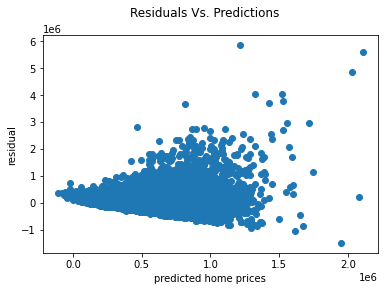

In [306]:
model_preds = model.predict(X_c)
resids = y - model_preds

fig, ax = plt.subplots()

ax.scatter(model_preds, resids)
ax.set_xlabel('predicted home prices')
ax.set_ylabel('residual')
plt.suptitle('Residuals Vs. Predictions');

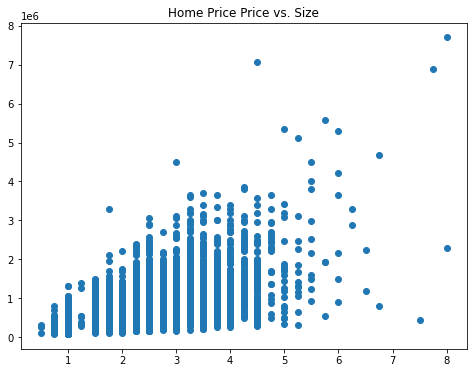

In [307]:
fig, ax = plt.subplots(ncols=1, figsize=(8, 6))


ax.scatter(X['bathrooms'], y)
ax.set_title('Home Price Price vs. Size');

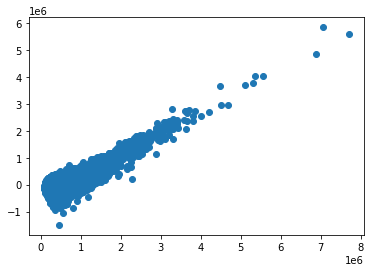

In [308]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

In [309]:
dw = sm.stats.stattools.durbin_watson

In [310]:
dw(resids)

1.9687771452935094

In [311]:
model.summary().tables[2]

Omnibus:,18797.249,Durbin-Watson:,1.969
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1298238.757
Skew:,3.855,Prob(JB):,0.00
Kurtosis:,40.192,Cond. No.,1.31


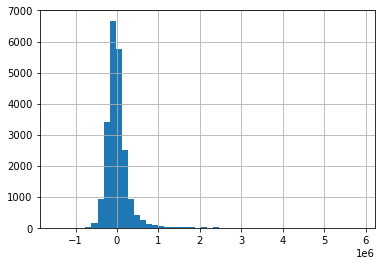

In [312]:
resids.hist(bins=50);

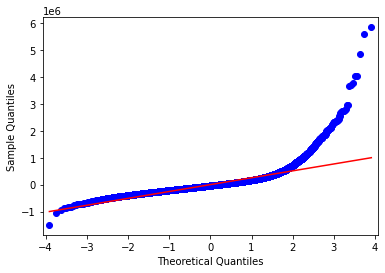

In [313]:
sm.qqplot(resids, line='r');

In [314]:
%history

#import all packages 
import pandas as pd
import pandas as pd
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

data = pd.read_csv('kc_house_data.csv')
clean_null = data.drop(columns=['view', 'waterfront', 'yr_renovated'], axis=1)
clean_null
clean_null['condition'].unique()
clean_null['grade'].unique()
data.head(10)
# drop columns that have no desire to our stakeholder 
clean_null = data.drop(columns=['view', 'waterfront', 'yr_renovated'], axis=1)
clean_null
clean_null.info()
clean_null['price_per_sqft'] = clean_null['price']  / clean_null['sqft_living']
clean_null
# eda stats 
clean_null.describe()
clean_null['']
# eda correlations
clean_null.corr()

y = clean_null['price']
x = clean_null['sqft_living']
X_c = sm.add_constant(x)


simple_model = sm.OLS(y, X_c)


simple_model_results = simple_model.fit()
print(simple_model_results.summary())
clean_null.columns
clean_null.info()
y = clean_null['price']
X = clean_null.drop(['id','date','sqft_living15','sqft_

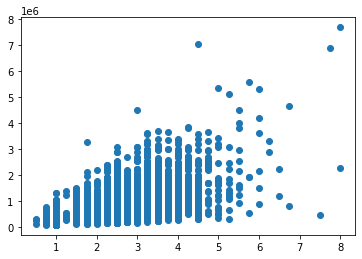

In [315]:
fig, ax = plt.subplots()

ax.scatter(y=clean_null['price'], x=clean_null['bathrooms']);

In [ ]:
clean_null['grade]

In [316]:
clean_null.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,zipcode,lat,long,price_per_sqft,grade_ordinal
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1788.596842,1970.999676,98077.951845,47.560093,-122.213982,314.932069,7.657915
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,827.759761,29.375234,53.513072,0.138552,0.140724,147.454847,1.173200
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,370.000000,1900.000000,98001.000000,47.155900,-122.519000,87.588235,3.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1190.000000,1951.000000,98033.000000,47.471100,-122.328000,206.489676,7.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1560.000000,1975.000000,98065.000000,47.571800,-122.231000,280.373832,7.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2210.000000,1997.000000,98118.000000,47.678000,-122.125000,391.441441,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,1516.746411,13.000000


In [317]:
model.summary().tables[2]

Omnibus:,18797.249,Durbin-Watson:,1.969
Prob(Omnibus):,0.000,Jarque-Bera (JB):,1298238.757
Skew:,3.855,Prob(JB):,0.00
Kurtosis:,40.192,Cond. No.,1.31


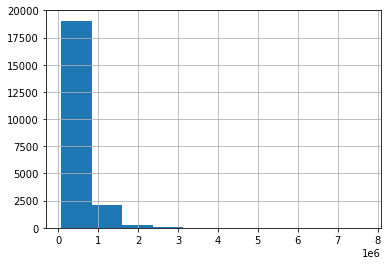

In [318]:
y.hist();

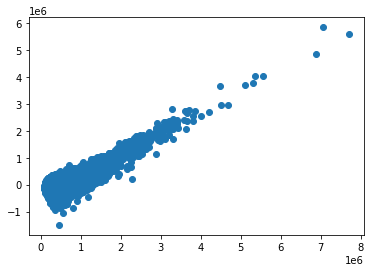

In [319]:
fig, ax = plt.subplots()

ax.scatter(y, resids);

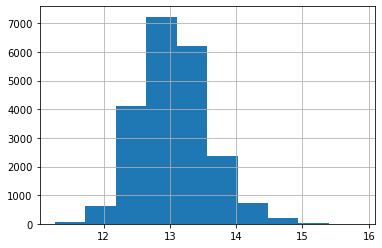

In [320]:
y_log = np.log(y)
y_log.hist();

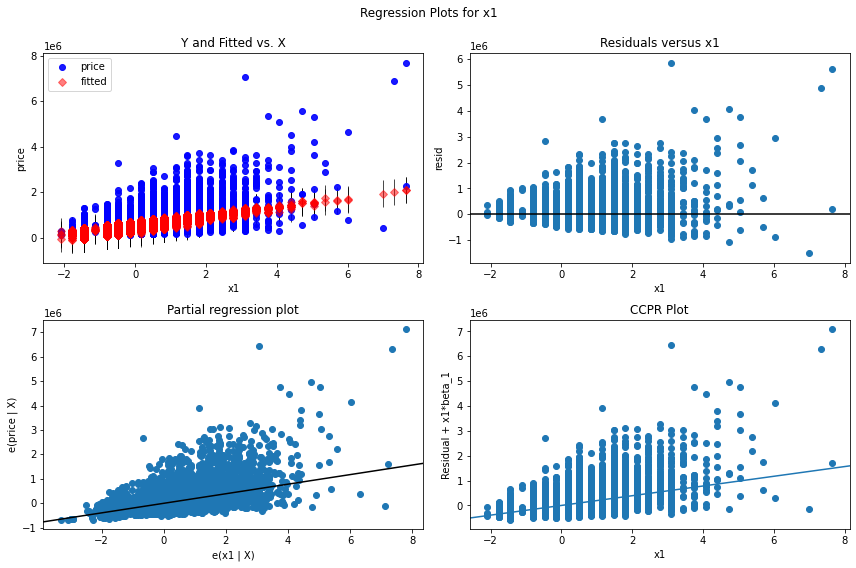

In [321]:
# 'x1' is 
sm.graphics.plot_regress_exog(model, 'x1', fig=plt.figure(figsize=(12, 8)));

In [ ]:
zip_home_size

In [ ]:
o_drop = ['id', 'date', 'view', 'sqft_above', 
           'sqft_basement', 'yr_renovated', 
           'zipcode', 'lat', 'long', 
           'sqft_living15', 'sqft_lot15']

In [322]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')